In [12]:
import numpy as np
import pandas as pd
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [13]:
train_dir = "train" #passing the path with training images
test_dir = "test"   #passing the path with testing images
validation_dir = "validation"

In [3]:
img_size = 48 #original size of the image

In [4]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)


In [5]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = validation_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical"
                                                             )
test_generator = validation_datagen.flow_from_directory(  directory=test_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical"
)

Found 21216 images belonging to 6 classes.
Found 7057 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


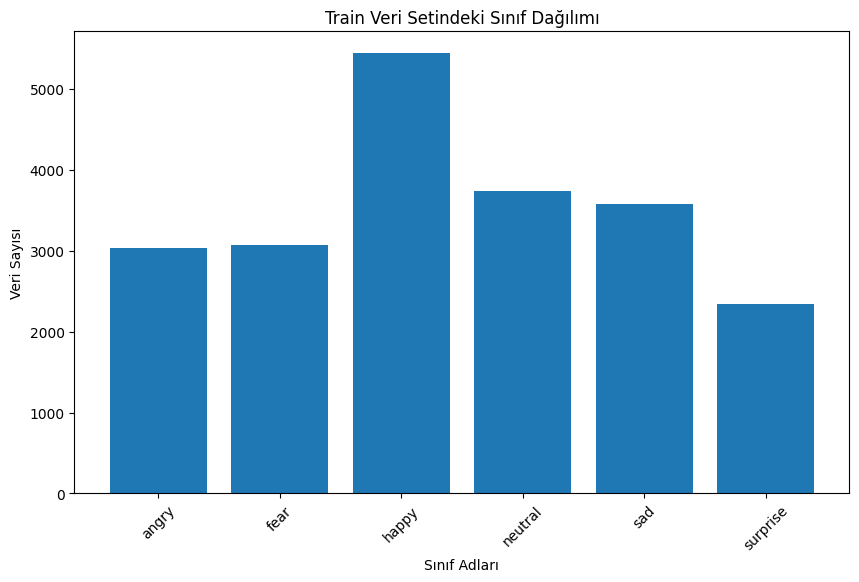

In [7]:
train_class_counts = train_generator.classes
unique_classes, class_counts = np.unique(train_class_counts, return_counts=True)

# Sınıf adları
class_names = list(train_generator.class_indices.keys())

# Bar grafiği çizin
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Sınıf Adları')
plt.ylabel('Veri Sayısı')
plt.title('Train Veri Setindeki Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()

In [6]:
model= tf.keras.models.Sequential()

model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(8, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))

In [7]:
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_19 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormali

In [9]:
epochs = 100
batch_size = 64

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Modeli eğitme
history = model.fit(x=train_generator,
                         steps_per_epoch=len(train_generator),
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=validation_generator,
                         validation_steps=len(validation_generator),
                         callbacks=[early_stopping]
                        )

Epoch 1/100
 37/295 [==>...........................] - ETA: 45s - loss: 2.0248 - accuracy: 0.2027

KeyboardInterrupt: 

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()     #hpcye yollarken yorum satırı

#fig.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
model.save('model_optimal.h5')
model.save_weights('model_weights.h5')

In [6]:
from tensorflow.keras.models import load_model, Sequential

def load_model_with_weights(model_filename, weights_filename):
    # Modeli yükle
    loaded_model = load_model(model_filename)
    
    # Yüklü modelin katmanlarını al
    layers = loaded_model.layers
    
    # Ağırlıkları içeren yeni bir model oluştur ve ağırlıkları yükle
    model = Sequential(layers)
    model.load_weights(weights_filename)
    
    # Modeli derle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [7]:
# Modeli ve ağırlıkları yükle
loaded_model = load_model_with_weights('model_optimal.h5', 'model_weights.h5')

In [8]:
# Yüklenmiş modeli kullanabilirsiniz
predictions = loaded_model.predict(test_generator)

111/111 [==============================] - 14s 67ms/step


In [30]:
from sklearn.metrics import accuracy_score

true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)  # En yüksek olasılığa sahip sınıfı seç
accuracy = accuracy_score(true_labels, predicted_labels, normalize=True)
print("Accuracy:", accuracy)

Accuracy: 0.17758596292627707


In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[0.09498956 0.0960334  0.2473904  0.21503132 0.21607516 0.13048017]
 [0.08105469 0.07714844 0.24316406 0.25       0.21875    0.12988281]
 [0.10033822 0.09808343 0.23900789 0.22829763 0.22435175 0.10992108]
 [0.10056772 0.09326845 0.23357664 0.22465531 0.22141119 0.12652068]
 [0.09141941 0.08740978 0.24137931 0.23656776 0.20769848 0.13552526]
 [0.09747292 0.08543923 0.21540313 0.22503008 0.22623345 0.15042118]]


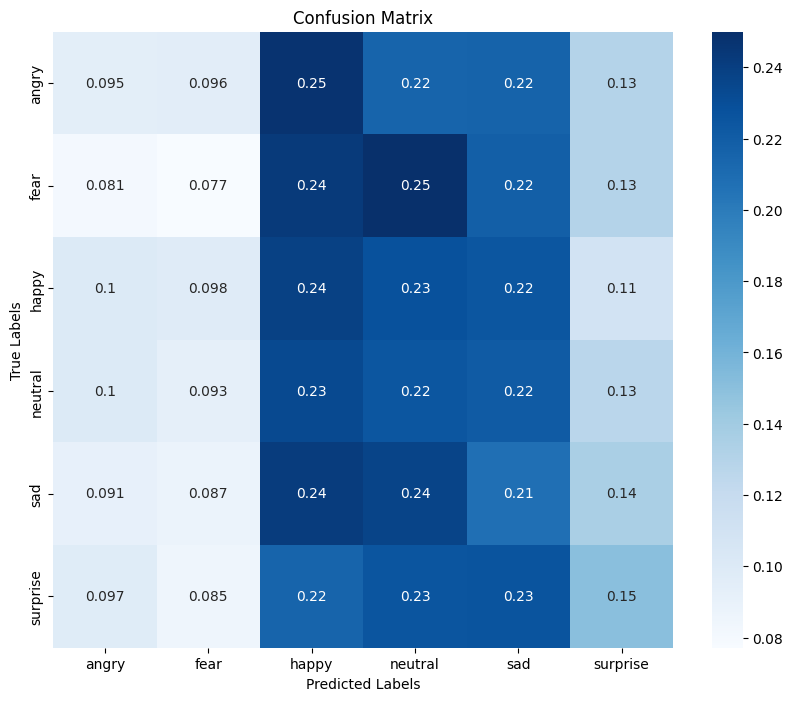

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2g', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {i}: Accuracy = {accuracy}")

Class 0: Accuracy = 0.09498956158663883
Class 1: Accuracy = 0.0771484375
Class 2: Accuracy = 0.23900789177001128
Class 3: Accuracy = 0.22465531224655313
Class 4: Accuracy = 0.2076984763432237
Class 5: Accuracy = 0.15042117930204574


In [15]:
from sklearn.metrics import classification_report

class_report = classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.09      0.11       958
        fear       0.14      0.09      0.11      1024
       happy       0.26      0.24      0.25      1774
     neutral       0.17      0.23      0.20      1233
         sad       0.18      0.22      0.20      1247
    surprise       0.11      0.12      0.11       831

    accuracy                           0.18      7067
   macro avg       0.16      0.16      0.16      7067
weighted avg       0.18      0.18      0.17      7067



In [9]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [10]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = cv2.flip(frame, 1)
    height, width, channel = frame.shape
    
    sub_img = frame[0:int(height/6), 0:int(width)]
    black_rect = np.ones(sub_img.shape, dtype=np.uint8) * 0
    res = cv2.addWeighted(sub_img, 0.77, black_rect, 0.23, 0)
    FONT = cv2.FONT_HERSHEY_SIMPLEX
    FONT_SCALE = 0.8
    FONT_THICKNESS = 2
    lable_color = (10, 10, 255)
    lable = "Cenk's Emotion Detection"
    lable_dimension = cv2.getTextSize(lable, FONT, FONT_SCALE, FONT_THICKNESS)[0]
    textX = int((res.shape[1] - lable_dimension[0]) / 2)
    textY = int((res.shape[0] + lable_dimension[1]) / 2)
    cv2.putText(res, lable, (textX, textY), FONT, FONT_SCALE, (0, 0, 0), FONT_THICKNESS)
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_image)
    
    if len(faces) > 0:
        x, y, w, h = faces[0]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        image_pixels = img_to_array(roi_gray)
        image_pixels = np.expand_dims(image_pixels, axis=0)
        image_pixels /= 255
        predictions = loaded_model.predict(image_pixels,verbose=0)
        max_index = np.argmax(predictions[0])
        emotion_detection = ('angry', 'fear', 'happy', 'neutral', 'sad', 'surprise')
        emotion_prediction = emotion_detection[max_index]
        cv2.putText(res, "Sentiment: {}".format(emotion_prediction), (0, textY+22+5), FONT, 0.7, lable_color, 2)
        lable_violation = 'Confidence: {}'.format(str(np.round(np.max(predictions[0])*100, 1)) + "%")
        violation_text_dimension = cv2.getTextSize(lable_violation, FONT, FONT_SCALE, FONT_THICKNESS)[0]
        violation_x_axis = int(res.shape[1] - violation_text_dimension[0])
        cv2.putText(res, lable_violation, (violation_x_axis, textY+22+5), FONT, 0.7, lable_color, 2)
    
    frame[0:int(height/6), 0:int(width)] = res
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
